Generate dataset for 2D Poisson periodic problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gaussian_random_fields as gr
import random
import h5py

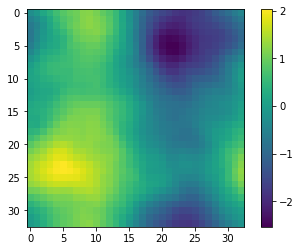

In [2]:
n = 2**5
rf = gr.gaussian_random_field(alpha=5, size=n+1)
im = plt.imshow(rf)
plt.colorbar(im)

In [3]:
a = np.random.randint(0,10,size=(5,5))
a

array([[5, 6, 5, 3, 9],
       [7, 7, 5, 6, 4],
       [3, 2, 5, 9, 0],
       [6, 3, 6, 6, 7],
       [2, 1, 2, 4, 2]])

In [4]:
np.pad(a,((0,1),(0,1)),'wrap')

array([[5, 6, 5, 3, 9, 5],
       [7, 7, 5, 6, 4, 7],
       [3, 2, 5, 9, 0, 3],
       [6, 3, 6, 6, 7, 6],
       [2, 1, 2, 4, 2, 2],
       [5, 6, 5, 3, 9, 5]])

In [5]:
def rand_rhs(n):
    alpha = random.uniform(5,20)
    a = random.uniform(0,5)
    rf = a*gr.gaussian_random_field(alpha=alpha, size=n)
    return np.pad(rf,((0,1),(0,1)),'wrap')

In [6]:
# Create dataset
n = 2**5

dataset = {}
n_data = 1000
f_data = np.zeros((n_data, n+1, n+1))
for i in range(n_data):
    f = rand_rhs(n) # output size is n+1
    f_data[i,:,:] = f.reshape((n+1, n+1))
    print("Data #-"+str(i)+" generated")

Data #-0 generated
Data #-1 generated
Data #-2 generated
Data #-3 generated
Data #-4 generated
Data #-5 generated
Data #-6 generated
Data #-7 generated
Data #-8 generated
Data #-9 generated
Data #-10 generated
Data #-11 generated
Data #-12 generated
Data #-13 generated
Data #-14 generated
Data #-15 generated
Data #-16 generated
Data #-17 generated
Data #-18 generated
Data #-19 generated
Data #-20 generated
Data #-21 generated
Data #-22 generated
Data #-23 generated
Data #-24 generated
Data #-25 generated
Data #-26 generated
Data #-27 generated
Data #-28 generated
Data #-29 generated
Data #-30 generated
Data #-31 generated
Data #-32 generated
Data #-33 generated
Data #-34 generated
Data #-35 generated
Data #-36 generated
Data #-37 generated
Data #-38 generated
Data #-39 generated
Data #-40 generated
Data #-41 generated
Data #-42 generated
Data #-43 generated
Data #-44 generated
Data #-45 generated
Data #-46 generated
Data #-47 generated
Data #-48 generated
Data #-49 generated
Data #-50 

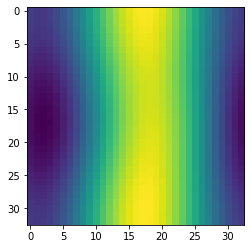

In [7]:
plt.imshow(f_data[0])

In [8]:
dataset['rhs'] = f_data

with h5py.File("poisson2d_33x33_pbc.h5", "w") as hf:
    for key, item in dataset.items():
        hf[key] = item